# Q2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import optimize
%matplotlib inline

In [ ]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'

In [6]:
titanic = pd.read_csv(url)

<IPython.core.display.Javascript object>

pandas.core.frame.DataFrame

In [71]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [32]:
titanic.drop(1309,inplace =True)

In [33]:
titanic.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [75]:
l= []
for i in titanic['sex']:
    if i =='female':
        j = 0
    else:
        j = 1
    l.append(j)


[1, 1, 1, 0]

In [76]:
titanic['sex_digit'] = l

In [77]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_digit
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN,0
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,0
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,1
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,1


In [41]:
y = titanic.iloc[:,3].values
y

array(['female', 'male', 'female', ..., 'male', 'male', 'male'],
      dtype=object)

In [37]:
d = titanic[['sex']]
type(d)

pandas.core.frame.DataFrame

In [38]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [42]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [43]:
y

array([0, 1, 0, ..., 1, 1, 1])

In [48]:
a = titanic.groupby('sex').describe().T
b = a.loc['pclass'].loc['count']
b

sex
female    466.0
male      843.0
Name: count, dtype: float64

<AxesSubplot:ylabel='count'>

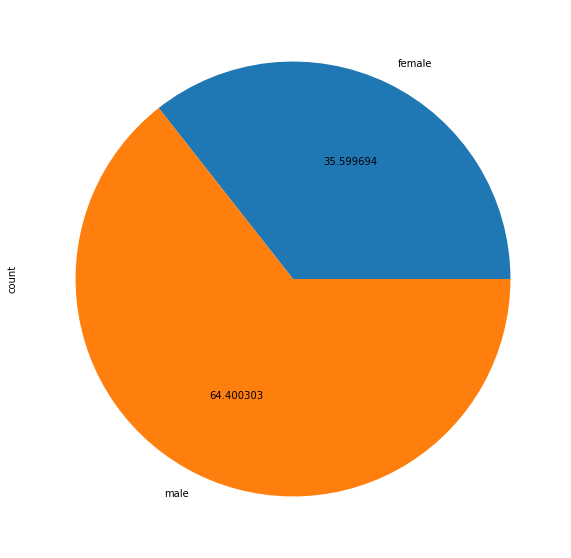

In [51]:
b.plot.pie(figsize = (10,10),autopct = '%3f')

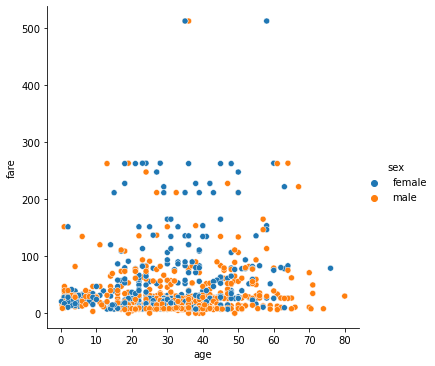

In [65]:
sns.relplot(data = titanic,x = 'age', y = 'fare',hue = 'sex')

<AxesSubplot:xlabel='age', ylabel='fare'>

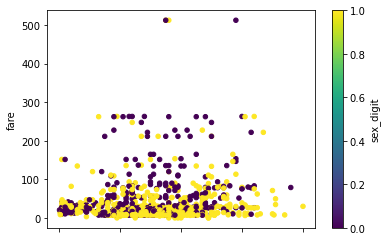

In [78]:
titanic.plot.scatter(x = 'age', y = 'fare', c= 'sex_digit', colormap = 'viridis')

# Q1

In [3]:
max_temp = np.array([39,41,43,47,49,51,45,38,37,29,27,25])
min_temp = np.array([21,23,27,28,32,35,31,28,21,19,17,18])

In [4]:
months = np.arange(12)

In [5]:
# months

Text(0, 0.5, 'Min and Max Temperature')

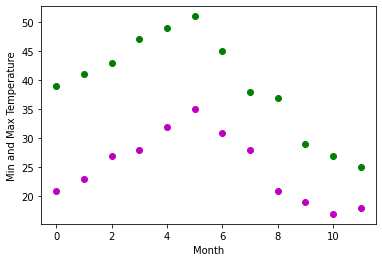

In [6]:
plt.plot(months,max_temp,'go')
plt.plot(months,min_temp,'mo')
plt.xlabel('Month')
plt.ylabel('Min and Max Temperature')

In [7]:
def temp (times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times+time_offset) * 2 * np.pi / times.max()))
max_res, max_cov = optimize.curve_fit(temp, months, max_temp, [30,20,0])
min_res, min_cov = optimize.curve_fit(temp, months, min_temp, [20,10,0])

Text(0, 0.5, 'Temperature deg. celcius')

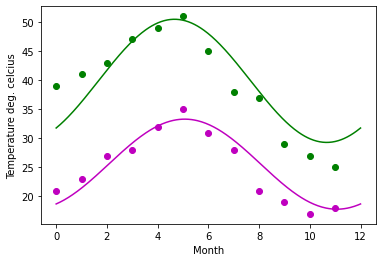

In [12]:
day = np.linspace(0,12, num = 300)
plt.figure()
plt.plot(months, max_temp, 'go')
plt.plot(day, temp(day, *max_res), 'g-')
plt.plot(months, min_temp, 'mo')
plt.plot(day, temp(day, *min_res), 'm-')
plt.xlabel('Month')
plt.ylabel('Temperature deg. celcius')